# **Logistic Regression**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [2]:
titanic_data = fetch_openml('titanic', version=1, as_frame=True)
titanic_data

{'data':       pclass                                             name     sex  \
 0          1                    Allen, Miss. Elisabeth Walton  female   
 1          1                   Allison, Master. Hudson Trevor    male   
 2          1                     Allison, Miss. Helen Loraine  female   
 3          1             Allison, Mr. Hudson Joshua Creighton    male   
 4          1  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
 ...      ...                                              ...     ...   
 1304       3                             Zabour, Miss. Hileni  female   
 1305       3                            Zabour, Miss. Thamine  female   
 1306       3                        Zakarian, Mr. Mapriededer    male   
 1307       3                              Zakarian, Mr. Ortin    male   
 1308       3                               Zimmerman, Mr. Leo    male   
 
           age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
 0     29.0000      0 

In [3]:
df = titanic_data['data']
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
df['survived'] = titanic_data['target']

<Axes: xlabel='survived', ylabel='count'>

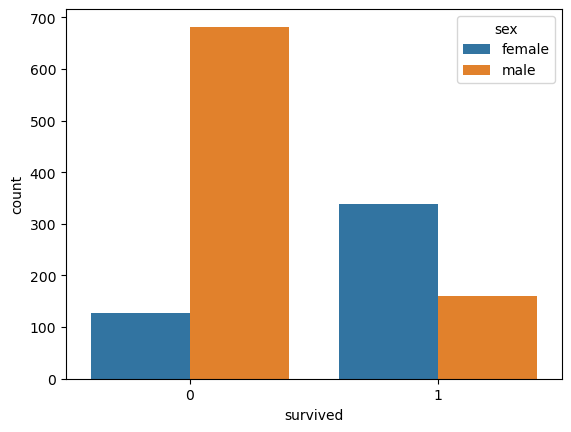

In [5]:
sns.countplot(x='survived', data=df, hue='sex')

<Axes: ylabel='Frequency'>

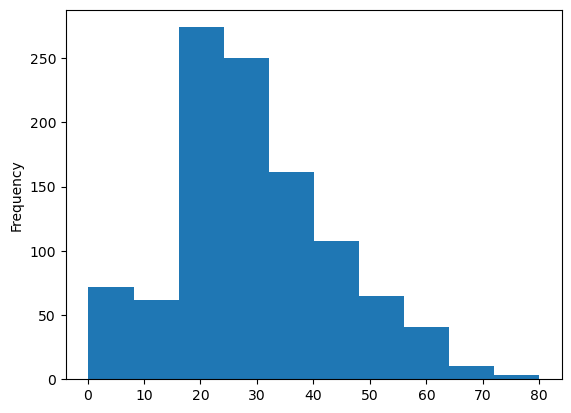

In [6]:
df['age'].plot.hist()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB


In [8]:
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

<Axes: title={'center': 'missing values in percentage'}, ylabel='percentage'>

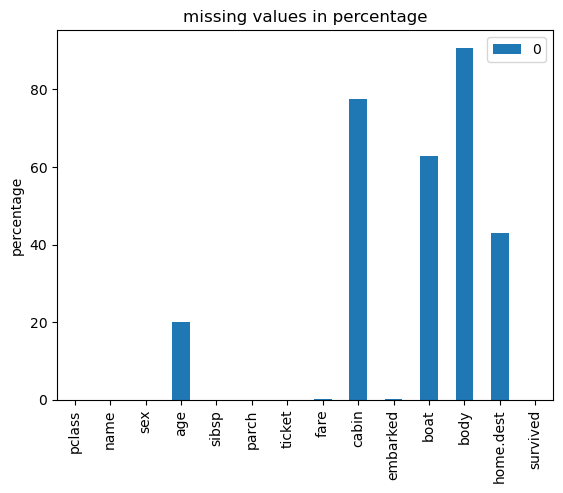

In [9]:
miss_vals = pd.DataFrame((df.isnull().sum()/len(df)) * 100)
miss_vals.plot(kind='bar', title='missing values in percentage', ylabel='percentage')

In [10]:
df['family'] = df['sibsp'] + df['parch']
df.loc[df['family'] > 0, 'travelled_alone'] = 0
df.loc[df['family'] == 0, 'travelled_alone'] = 1

In [11]:
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,travelled_alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,1.0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,0.0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,3,0.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,0,1,0.0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,0,1,0.0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0,0,1.0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0,0,1.0


In [12]:
df.drop(['sibsp', 'parch'], axis=1, inplace=True)


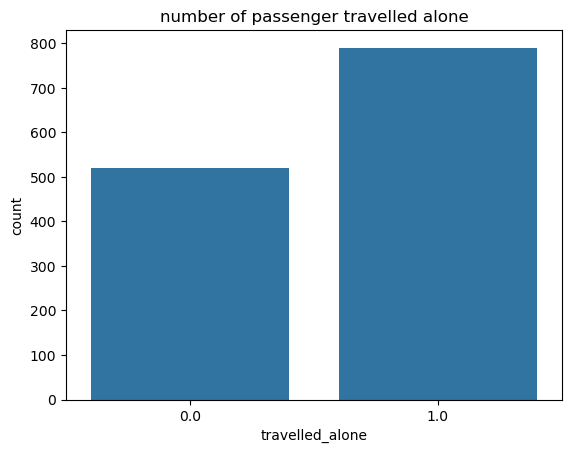

In [13]:
sns.countplot(x='travelled_alone', data=df)
plt.title('number of passenger travelled alone')
plt.show()

In [15]:
df


,pclass,name,sex,age,ticket,fare,cabin,embarked,boat,body,home.dest,survived,family,travelled_alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0,1.0
1,1,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,0.0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,3,0.0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,2665,14.4542,NaN,C,NaN,328.0,NaN,0,1,0.0
1305,3,"Zabour, Miss. Thamine",female,NaN,2665,14.4542,NaN,C,NaN,NaN,NaN,0,1,0.0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,2656,7.2250,NaN,C,NaN,304.0,NaN,0,0,1.0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,2670,7.2250,NaN,C,NaN,NaN,NaN,0,0,1.0


In [19]:
# df.drop(['name', 'ticket', 'home.dest'], axis=1, inplace=True)
df.drop(['cabin', 'body', 'boat'], axis=1, inplace=True)

In [20]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled_alone
0,1,female,29.0000,211.3375,S,1,0,1.0
1,1,male,0.9167,151.5500,S,1,3,0.0
2,1,female,2.0000,151.5500,S,0,3,0.0
3,1,male,30.0000,151.5500,S,0,3,0.0
4,1,female,25.0000,151.5500,S,0,3,0.0


In [26]:
sex = pd.get_dummies(df['sex'], drop_first=True)
print(sex)

       male
0     False
1      True
2     False
3      True
4     False
...     ...
1304  False
1305  False
1306   True
1307   True
1308   True

[1309 rows x 1 columns]


In [27]:
df.isnull().sum()

pclass               0
sex                  0
age                263
fare                 1
embarked             2
survived             0
family               0
travelled_alone      0
dtype: int64

In [28]:
from sklearn.impute import SimpleImputer

In [29]:
imp_mean = SimpleImputer(strategy='mean')

In [31]:
df['age'] = imp_mean.fit_transform(df[['age']])
df['fare'] = imp_mean.fit_transform(df[['fare']])


In [32]:
df.isnull().sum()

pclass             0
sex                0
age                0
fare               0
embarked           2
survived           0
family             0
travelled_alone    0
dtype: int64

In [33]:
imp_freq = SimpleImputer(strategy='most_frequent')

In [38]:
# Use .ravel() to flatten the 2D array into 1D
df['embarked'] = imp_freq.fit_transform(df[['embarked']]).ravel()


In [39]:
df.isnull().sum()

pclass             0
sex                0
age                0
fare               0
embarked           0
survived           0
family             0
travelled_alone    0
dtype: int64

In [40]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,travelled_alone
0,1,female,29.0000,211.3375,S,1,0,1.0
1,1,male,0.9167,151.5500,S,1,3,0.0
2,1,female,2.0000,151.5500,S,0,3,0.0
3,1,male,30.0000,151.5500,S,0,3,0.0
4,1,female,25.0000,151.5500,S,0,3,0.0


In [44]:
embark = pd.get_dummies(df['embarked'], drop_first=True)
embark

,Q,S
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
1304,False,False
1305,False,False
1306,False,False
1307,False,False


# df.drop(['embarked'], axis=1, inplace=True)
# df = pd.concat([df, embark], axis=1)

# drop object is permanent so before fropping make the copy of the orignal data

In [53]:
df.head()

,pclass,sex,age,fare,survived,family,travelled_alone
0,1,female,29.0000,211.3375,1,0,1.0
1,1,male,0.9167,151.5500,1,3,0.0
2,1,female,2.0000,151.5500,0,3,0.0
3,1,male,30.0000,151.5500,0,3,0.0
4,1,female,25.0000,151.5500,0,3,0.0


In [54]:
X = df.drop(['survived'], axis=1)
X.head()

,pclass,sex,age,fare,family,travelled_alone
0,1,female,29.0000,211.3375,0,1.0
1,1,male,0.9167,151.5500,3,0.0
2,1,female,2.0000,151.5500,3,0.0
3,1,male,30.0000,151.5500,3,0.0
4,1,female,25.0000,151.5500,3,0.0


In [58]:
y = df['survived']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: category
Categories (2, object): ['0', '1']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [60]:
print(X_train.shape, y_train.shape)

(916, 6) (393, 6)


In [62]:
print(X_test.shape, y_test.shape)

(393, 6) (393,)


In [63]:
from sklearn.linear_model import LogisticRegression

In [70]:
X_train_encoded = pd.get_dummies(X_train)

# Fit the model
mod = LogisticRegression()
mod.fit(X_train_encoded, y_train)

C:\Users\Ramsaheb Prasad\.conda\envs\Itachi\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
# Apply the same one-hot encoding to X_test
X_test_encoded = pd.get_dummies(X_test)

# Align the columns of X_test to match X_train (this ensures the same feature set)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Now predict using the encoded test data
pred = mod.predict(X_test_encoded)


In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(y_test, pred)

0.8015267175572519

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
confusion_matrix(y_test, pred)

array([[206,  30],
       [ 48, 109]], dtype=int64)